In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/GS_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UTX_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/HD_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/VZ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/XOM_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MMM_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/TRV_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [36]:
data = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [33]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values
training_set

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [167.74],
       [166.99],
       [166.7 ]])

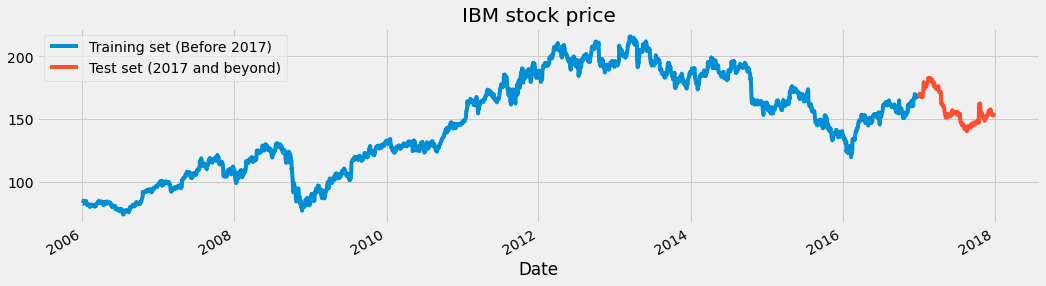

In [15]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [16]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2709, 60, 1)

In [24]:
regressorGRU = Sequential()
regressorGRU.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(GRU(50, return_sequences=True))
regressorGRU.add(GRU(50, return_sequences=True))
regressorGRU.add(GRU(50))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'])
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.33)

Train on 1815 samples, validate on 894 samples
Epoch 1/20
1815/1815 [==============================] - 11s 6ms/step - loss: 0.0139 - accuracy: 0.0011 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 2/20
1815/1815 [==============================] - 9s 5ms/step - loss: 0.0067 - accuracy: 0.0011 - val_loss: 5.6301e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
1815/1815 [==============================] - 9s 5ms/step - loss: 0.0047 - accuracy: 0.0011 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 4/20
1815/1815 [==============================] - 9s 5ms/step - loss: 0.0044 - accuracy: 0.0011 - val_loss: 9.7905e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
1815/1815 [==============================] - 8s 5ms/step - loss: 0.0045 - accuracy: 0.0011 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/20
1815/1815 [==============================] - 8s 5ms/step - loss: 0.0040 - accuracy: 0.0011 - val_loss: 5.9965e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
1815/1815 [==============================

In [27]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
inputs.shape

(311, 1)

In [28]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

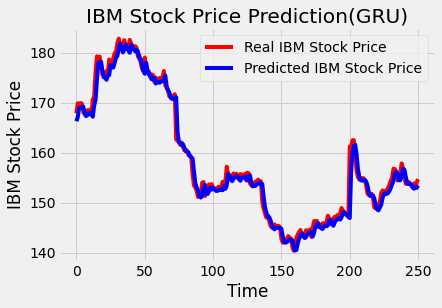

In [29]:
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction(GRU)')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [30]:
rmse = math.sqrt(mean_squared_error(test_set, GRU_predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.6706269361835897.
